<a href="https://colab.research.google.com/github/vijayshiv/Airbnb-data-analysis/blob/main/Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [69]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

from pandas.api.types import CategoricalDtype

%matplotlib inline

import seaborn as sns

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [70]:
airbnb_nyc = pd.read_csv('/content/drive/MyDrive/Airbnb NYC 2019.csv')

In [71]:
# This is the data set that we have
airbnb_nyc.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [72]:
# Total number of rows and columns
airbnb_nyc.shape

(48895, 16)

In [73]:
airbnb_nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [74]:
# How many room types are available for rental?
airbnb_nyc.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [75]:
# How many neighborhood groups are there?
airbnb_nyc.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [76]:
# How many neighborhoods are there?
airbnb_nyc.neighbourhood.nunique()

221

In [77]:
# How many hosts are there?
airbnb_nyc.host_id.nunique()

37457

#**Q.1 What can we learn about different hosts and areas?**

####The dataset has 16 columns and 48,895 rows, but a significant number of values seem to be missing from the last_review and reviews_per_month columns. It includes information about the listings, such as id, host name, room type, price, and neighborhood.

####There are five different neighborhood groups, 221 neighborhoods, 37,457 hosts, 48,895 listings, and three types of room available for rental.


####**Now we are going to check the missing values and null values after that we will perform our analysis on the data**

In [78]:
# How many null values are there in the data set?
airbnb_nyc.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

####From the above analysis we came to know that name has 16, host_name has has 21 last_reviw and rewies_per_month has more than 10000 null values.

####So, now we are going to replace all the null values with zero.

In [79]:
airbnb_nyc.fillna({'reviews_per_month': 0,'host_name' : 0,'name' : 0,'last_review':0,'number_of_reviews':0}, inplace=True)

In [80]:
# Checking if any feild is left
airbnb_nyc.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [81]:
# Check if there any duplicated values left
airbnb_nyc.duplicated().sum()

0

**No duplicated values found**

In [18]:
airbnb_nyc.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


###The average price is 152.72, the average minimum nights stay is 7.03 nights, and the average number of reviews is 23.27 per listing. We also learnt that every host has an average of 7.14 places listed and availability averages 112.78 vacant days per year.
###The minimun price is showing zero which cant be possible.

In [83]:
airbnb_nyc.agg({'price': ['mean', 'median', 'min', 'max', 'count']})

,price
mean,152.720687
median,106.000000
min,0.000000
max,10000.000000
count,48895.000000


###The minimum price is zero, since no hotel will provide free rooms as this is not a possible condition

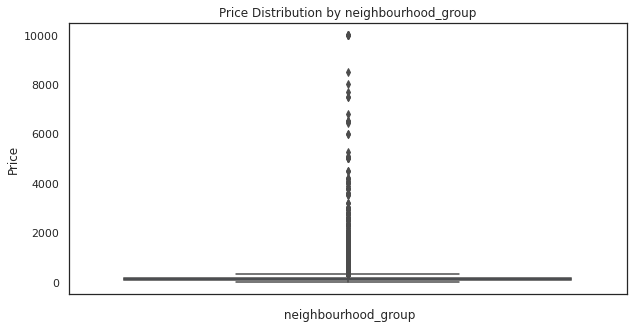

In [84]:
plt.figure(figsize=(10,5))
ax = sns.boxplot(y='price', data=airbnb_nyc).set_title('Price Distribution by neighbourhood_group')
sns.set_theme(style='white')
plt.xlabel(' neighbourhood_group')
plt.ylabel('Price')
plt.show()

In [85]:
# See the number of listings
airbnb_pivot = pd.pivot_table(airbnb_nyc, index=['neighbourhood_group'], values='id', aggfunc=['count'], 
                              margins=True, margins_name='Total Count')
airbnb_pivot

,count
,id
neighbourhood_group,
Bronx,1091
Brooklyn,20104
Manhattan,21661
Queens,5666
Staten Island,373
Total Count,48895


##As we know pivot table is used to summarise data, that is how we came to know about the listings of all the neighbourhood groups.

####Bronx	618
####Brooklyn	14313
####Manhattan	16678
####Queens	3578
####Staten Island	225
####Total Count	35412

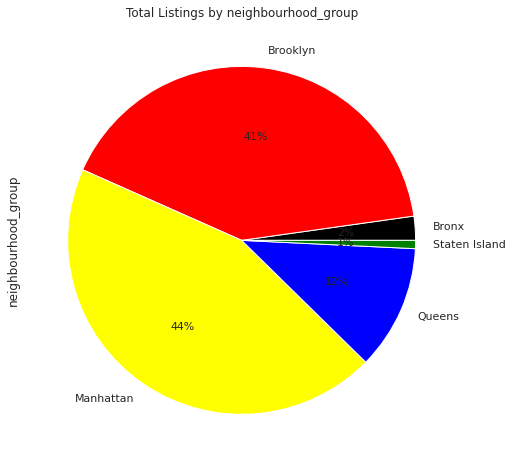

In [86]:
# Plotting a pie chart to clearly see the number of listing
df2 = airbnb_nyc.groupby(['neighbourhood_group'])['id'].count()
df2.plot.pie(ylabel='neighbourhood_group', title='Total Listings by neighbourhood_group', 
             autopct='%1.0f%%', fontsize='11', colors=['black', 'red', 'yellow', 'blue', 'green'],
             startangle=0, figsize=(10,8))
plt.show()

###We can see that **Manhattan** has the highest number of listings - making up for 47% of the total - followed by Brooklyn with 40%. The other three boroughs have significantly less listings: Queens (10%), Bronx (2%), and Staten Island (1%).

In [87]:
airbnb_nyc.host_name.unique()

array(['John', 'Jennifer', 'Elisabeth', ..., 'Abayomi', 'Alberth',
       'Ilgar & Aysel'], dtype=object)

# **Q2.What can we learn from predictions? (ex: locations, prices, reviews, etc)**

In [88]:
# Creating palette
my_pal = {'Brooklyn': 'green', 'Manhattan': 'blue', 'Queens': 'red', 'Staten Island': 'yellow', 'Bronx': 'brown'}

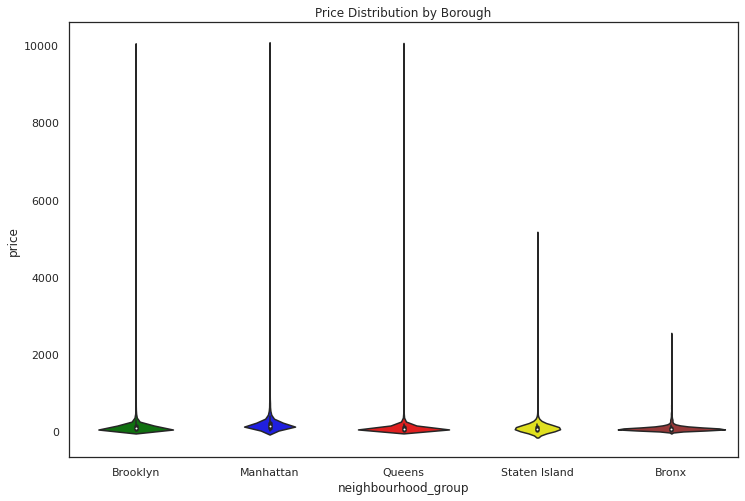

In [89]:
plt.figure(figsize=(12,8))
ax = sns.violinplot(x="neighbourhood_group", y="price", data=airbnb_nyc, palette=my_pal).set_title('Price Distribution by Borough')
plt.show()

###There are outliers present. In order to fix this issue, we will use quantile-based flooring and capping to treat the outliers.

In [91]:
# Low quantile
q_low = airbnb_nyc['price'].quantile(0.10)
q_low

60.0

In [92]:
# High quantile
q_high = airbnb_nyc['price'].quantile(0.90)
q_high

281.8000000000029

In [93]:
# Removing rows with values below 0.10
airbnb_nyc = airbnb_nyc.drop(airbnb_nyc[airbnb_nyc.price < q_low].index)

In [94]:
airbnb_nyc = airbnb_nyc.drop(airbnb_nyc[airbnb_nyc.price > q_high].index)

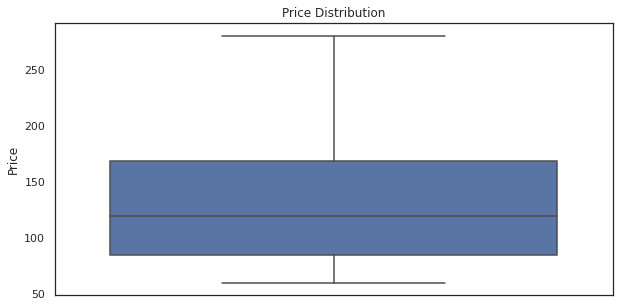

In [96]:
#Plotting a box chart to get clear visualization of the data
plt.figure(figsize=(10,5))
ax = sns.boxplot(y='price', data=airbnb_nyc).set_title('Price Distribution')
sns.set_theme(style='white')
plt.ylabel('Price')
plt.show()

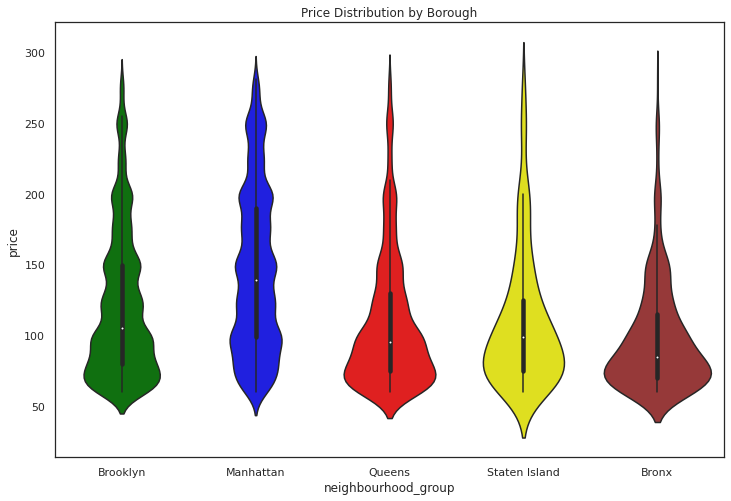

In [97]:
plt.figure(figsize=(12,8))
ax = sns.violinplot(x="neighbourhood_group", y="price", data=airbnb_nyc, palette=my_pal).set_title('Price Distribution by Borough')
plt.show()

###Average price by neighbourhood_group by using Bar Graph

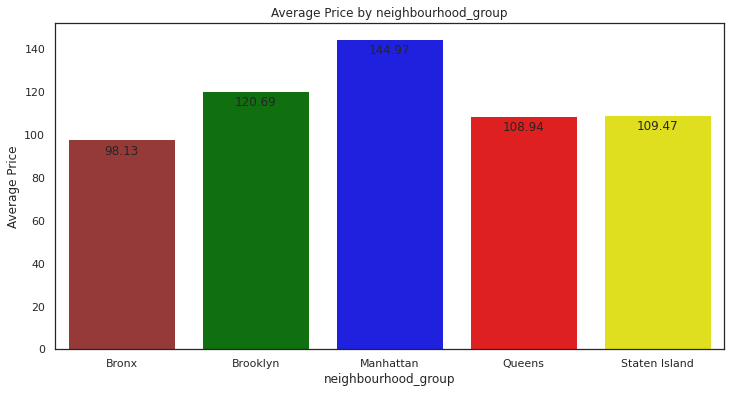

In [99]:
df = airbnb_nyc[['neighbourhood_group', 'price']]
df = airbnb_nyc.groupby(['neighbourhood_group'], as_index=False)[['price']].mean()

plt.figure(figsize=(12, 6))
df = sns.barplot(x="neighbourhood_group", y="price", data=df, palette=my_pal)
for p in df.patches:
    df.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', size = 12, 
                   xytext = (0, -12), textcoords = 'offset points')
    
plt.xlabel('neighbourhood_group')
plt.ylabel('Average Price')
plt.title('Average Price by neighbourhood_group')
plt.show()

###In the above chart,the most expensive neighbourhood_group is Manhattam with avg of $138.8.

###The second most expensive is Brooklyn with avg $110.9.

###The prices for the three other boroughs are cheaper, with the Bronx being the most affordable one, averaging $89.46.

In [101]:
airbnb_nyc.head(4)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194


###Average price by room type

In [102]:
my_pal2 = {'Entire home/apt': 'red', 'Private room': 'blue', 'Shared room': 'yellow'}

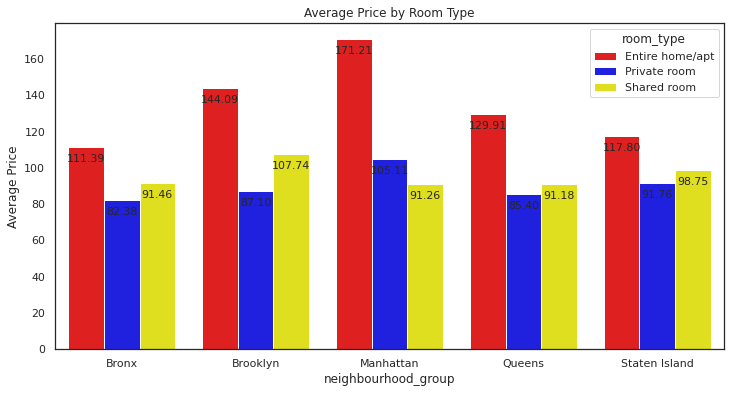

In [103]:
df = airbnb_nyc[['neighbourhood_group', 'room_type', 'price']]
df = df.groupby(['neighbourhood_group', 'room_type'], as_index=False)[['price']].mean()

plt.figure(figsize=(12, 6))
sns.set_theme(style='white')
df = sns.barplot(x="neighbourhood_group", y="price", data=df, hue='room_type', palette=my_pal2)
for p in df.patches:
    df.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', size = 11, 
                   xytext = (0, -12), textcoords = 'offset points')
    plt.xlabel('neighbourhood_group')
plt.ylabel('Average Price')
plt.title('Average Price by Room Type')
plt.show()


###The data is grouped by neighbourhood_group and room type. Manhattan maintains the highest prices for both entire homes and private rooms, and the average price for a shared room costs more than a private room in all the other neighbourhood_group.

In [104]:
# The average reviews 
airbnb_nyc['number_of_reviews'].value_counts().mean()

98.0

In [105]:
df_r=airbnb_nyc.groupby(['last_review', 'neighbourhood_group'])['number_of_reviews'].mean().unstack()

In [106]:
df_r.fillna(0, inplace=True)
df_r

neighbourhood_group,Bronx,Brooklyn,Manhattan,Queens,Staten Island
last_review,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000
2011-04-25,0.000000,14.000000,0.000000,0.000000,0.000000
2011-05-12,0.000000,2.000000,0.000000,0.000000,0.000000
2011-09-18,0.000000,9.000000,0.000000,0.000000,0.000000
2011-09-19,0.000000,0.000000,0.000000,1.000000,0.000000
...,...,...,...,...,...
2019-07-04,28.500000,63.059406,63.965909,54.903226,53.500000
2019-07-05,17.090909,61.297872,66.578313,55.164384,59.857143
2019-07-06,36.272727,58.167598,56.792208,55.328358,48.800000


Text(0.5, 0, 'neighbourhood_group')

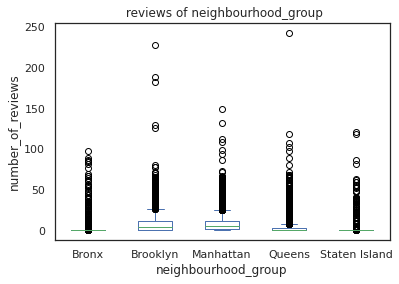

In [107]:
df_r.plot(kind="box")
plt.title(' reviews of neighbourhood_group')
plt.ylabel('number_of_reviews')
plt.xlabel('neighbourhood_group')


###The above graph show the analysis of reviews of neighbourhood_group

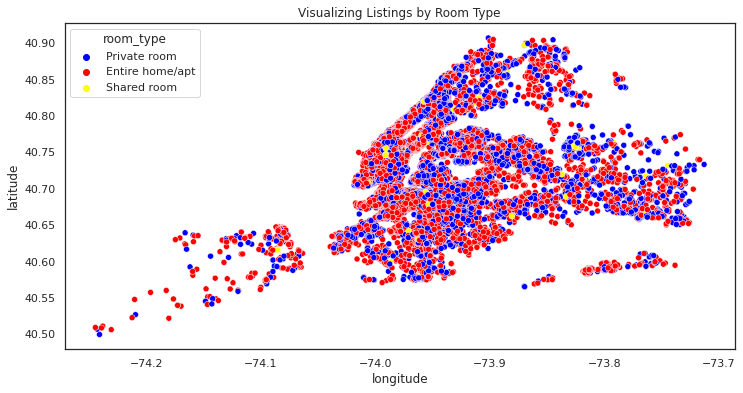

In [109]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(12,6))
sns.scatterplot(airbnb_nyc.longitude, airbnb_nyc.latitude,hue=airbnb_nyc.room_type, palette=my_pal2).set_title('Visualizing Listings by Room Type')
plt.ioff()

###In this scatter plot map, it is easy to spot the different room types available for rental in NYC. Manhattan is the only neighbourhood_group that has more entire homes listed than any other type of accommodation. As for the other neighbourhood_group, private room is the most popular room type, presenting the most offers.

In [110]:
busy_host=airbnb_nyc[(airbnb_nyc['neighbourhood_group'] == 'Manhattan') & (airbnb_nyc['host_name']) & (airbnb_nyc['room_type'] == 'Entire home/apt') & (airbnb_nyc['number_of_reviews'] > 350)]

In [111]:
busy_host

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
341,84659,Large Studio--Heart of East Village,462776,Kyle,Manhattan,East Village,40.72843,-73.98895,Entire home/apt,139,1,388,2019-06-26,3.88,1,142
398,126443,☆Massive DUPLEX☆ 2BR & 2BTH East Village 9+ Gu...,627217,Seith,Manhattan,East Village,40.72939,-73.98857,Entire home/apt,189,2,403,2019-07-07,4.10,3,201
3552,2119216,"Affordable, Private, Simple & Clean NYC Flat!",10806025,Christina,Manhattan,Harlem,40.82029,-73.93861,Entire home/apt,80,1,353,2019-06-19,5.26,1,258
4940,3540722,Modern Bohemian Studio,17820464,Allison,Manhattan,East Village,40.72454,-73.97836,Entire home/apt,145,1,358,2018-12-03,5.96,1,3
5382,3888752,"Bright, quiet, cozy 1BR by C Park!",20116872,Michael,Manhattan,Upper West Side,40.77571,-73.97757,Entire home/apt,195,1,401,2019-06-30,6.76,1,178


In [112]:
# Number of reviews according to host's names
table = pd.pivot_table(busy_host, values='number_of_reviews', index=['host_name'])
table

,number_of_reviews
host_name,
Allison,358
Christina,353
Kyle,388
Michael,401
Seith,403


Text(0.5, 0, 'host_name')

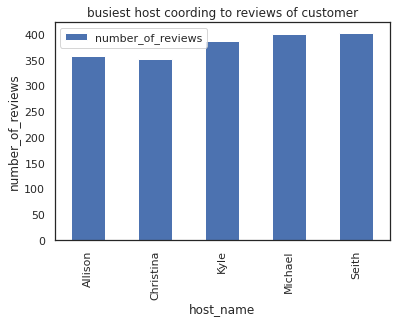

In [116]:
# Visualization for above data
table.plot(kind='bar')

plt.title('busiest host coording to reviews of customer')
plt.ylabel('number_of_reviews')
plt.xlabel('host_name')

###The above bar plot shows high rated hosts

# **Q3.Which hosts are the busiest and why?** 

In [118]:
# Calculating the average availability of rooms according to neighbourhood_group
airbnb_nyc.groupby(['neighbourhood_group'])['availability_365'].mean()

neighbourhood_group
Bronx            171.302100
Brooklyn          98.686674
Manhattan        105.144650
Queens           140.976415
Staten Island    200.131579
Name: availability_365, dtype: float64

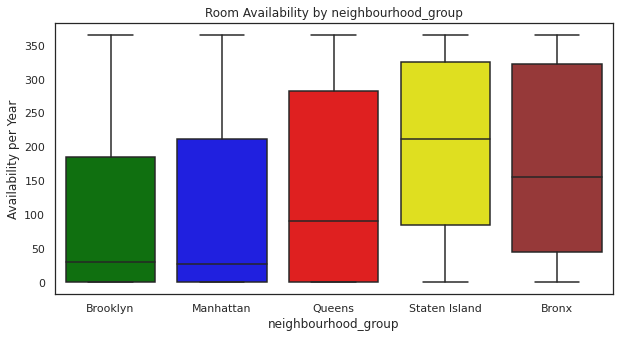

In [120]:
# Box plot for the above data
plt.figure(figsize=(10,5))
ax = sns.boxplot(data=airbnb_nyc, x='neighbourhood_group', y='availability_365', palette=my_pal).set_title('Room Availability by neighbourhood_group')
sns.set_theme(style='white')
plt.xlabel('neighbourhood_group')
plt.ylabel('Availability per Year')
plt.show()

In [121]:
busy_host2=airbnb_nyc[(airbnb_nyc['availability_365'] <50) & (airbnb_nyc['neighbourhood_group']== 'Manhattan')& (airbnb_nyc['room_type'] == 'Entire home/apt')& (airbnb_nyc['number_of_reviews'] > 350)]
busy_host2

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
4940,3540722,Modern Bohemian Studio,17820464,Allison,Manhattan,East Village,40.72454,-73.97836,Entire home/apt,145,1,358,2018-12-03,5.96,1,3


In [122]:
table2 =pd.pivot_table(busy_host2, values='availability_365', index=['host_name'])
table2

,availability_365
host_name,
Allison,3


###The above analysis shows the host name which is busiest among all because of availability_365 is only 3 and the number of reviews are maximum than 350

# **Q4.Is there any noticeable difference of traffic among different areas and what could be the reason for it?**

###We can determine the traffic difference through number of listings in neighbourhood

In [123]:
# Calculating the number of listings in neighbourhood
d = airbnb_nyc.groupby(['neighbourhood'])['id'].count().nlargest(10)
d

neighbourhood
Williamsburg          3182
Bedford-Stuyvesant    2507
Harlem                2041
Hell's Kitchen        1588
Upper West Side       1588
East Village          1576
Upper East Side       1556
Bushwick              1438
Crown Heights         1094
Midtown               1021
Name: id, dtype: int64

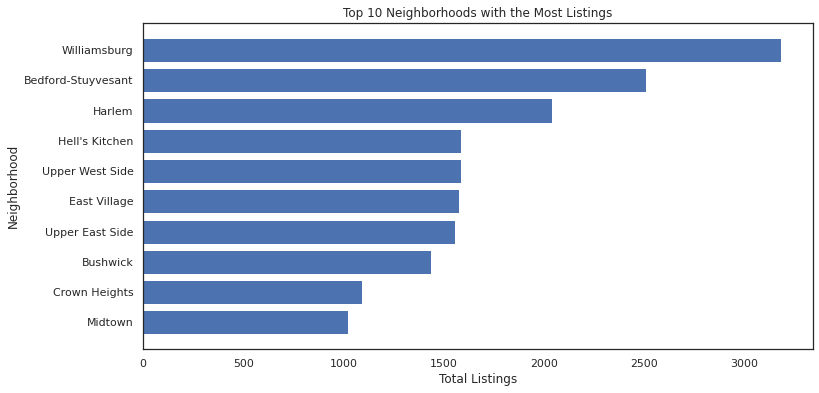

In [125]:
# Bar graph for the above data
plt.figure(figsize=(12,6))
x = list(d.index)
y = list(d.values)
x.reverse()
y.reverse()

plt.title("Top 10 Neighborhoods with the Most Listings")
plt.ylabel("Neighborhood")
plt.xlabel("Total Listings")

plt.barh(x, y)
plt.show()

###The neighborhoods with the most listings are in Manhattan and Brooklyn – which is understandable – given that tourists are more likely to stay in those areas. Williamsburg, in Brooklyn, appears first with 3145 listings. In Manhattan, Harlem has the most listings, totaling 2029 offers.